In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Data

* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* pickup_timeofday
* pickup_ispeak
* pickup_day
* dropoff_...
* pickup_borough
* dropoff_borough

* trip_duration - duration of the trip in seconds (Target)

In [2]:
data = pd.read_csv('processed.csv', index_col=[1])

In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_timeofday,pickup_ispeak,pickup_day,dropoff_timeofday,dropoff_ispeak,dropoff_day,pickup_borough,dropoff_borough,distance
id,,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,afternoon,True,0,afternoon,True,0,manhattan,manhattan,1502
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,midnight,False,6,midnight,False,6,manhattan,manhattan,1809
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,morning,False,1,afternoon,False,1,manhattan,manhattan,6380
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,night,False,2,night,False,2,manhattan,manhattan,1484
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,afternoon,False,5,afternoon,False,5,manhattan,manhattan,1187


In [5]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day,dropoff_day,distance
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.528529,1.660661,-73.972514,40.751071,-73.971813,40.752614,924.291291,3.036036,3.035035,3443.224224
std,0.499435,1.285016,0.039239,0.027962,0.037707,0.034174,2722.573756,1.982059,1.984856,3931.369698
min,1.000000,1.000000,-74.017303,40.641460,-74.177597,40.577190,3.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.991817,40.738911,-73.991295,40.734335,414.000000,1.000000,1.000000,1303.000000
50%,2.000000,1.000000,-73.981285,40.754971,-73.979126,40.756191,671.000000,3.000000,3.000000,2130.000000
75%,2.000000,2.000000,-73.965744,40.768538,-73.961617,40.770672,1074.500000,5.000000,5.000000,4161.500000
max,2.000000,6.000000,-73.776733,40.849972,-73.593582,41.043865,84594.000000,6.000000,6.000000,45143.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, id2875421 to id3498529
Data columns (total 19 columns):
vendor_id             999 non-null int64
pickup_datetime       999 non-null object
dropoff_datetime      999 non-null object
passenger_count       999 non-null int64
pickup_longitude      999 non-null float64
pickup_latitude       999 non-null float64
dropoff_longitude     999 non-null float64
dropoff_latitude      999 non-null float64
store_and_fwd_flag    999 non-null object
trip_duration         999 non-null int64
pickup_timeofday      999 non-null object
pickup_ispeak         999 non-null bool
pickup_day            999 non-null int64
dropoff_timeofday     999 non-null object
dropoff_ispeak        999 non-null bool
dropoff_day           999 non-null int64
pickup_borough        999 non-null object
dropoff_borough       995 non-null object
distance              999 non-null int64
dtypes: bool(2), float64(4), int64(6), object(7)
memory usage: 142.4+ KB


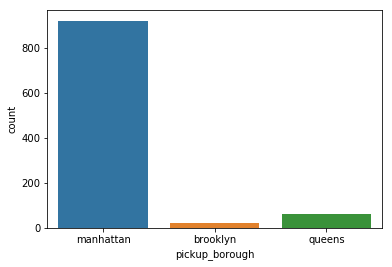

In [7]:
sns.countplot(data['pickup_borough'])

# Adjust the longitude, latitude

Longitude and Latitude values are definitely something that may affect the result, we need to thus represent them into 3 dimensions.

In [8]:
data['pickup_x'] = np.cos(data['pickup_latitude']) * np.cos(data['pickup_longitude'])
data['pickup_y'] = np.cos(data['pickup_latitude']) * np.sin(data['pickup_longitude'])
data['pickup_z'] = np.sin(data['pickup_latitude'])

data['dropoff_x'] = np.cos(data['dropoff_latitude']) * np.cos(data['dropoff_longitude'])
data['dropoff_y'] = np.cos(data['dropoff_latitude']) * np.sin(data['dropoff_longitude'])
data['dropoff_z'] = np.sin(data['dropoff_latitude'])

In [9]:
data = data.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, id2875421 to id3498529
Data columns (total 21 columns):
vendor_id             999 non-null int64
pickup_datetime       999 non-null object
dropoff_datetime      999 non-null object
passenger_count       999 non-null int64
store_and_fwd_flag    999 non-null object
trip_duration         999 non-null int64
pickup_timeofday      999 non-null object
pickup_ispeak         999 non-null bool
pickup_day            999 non-null int64
dropoff_timeofday     999 non-null object
dropoff_ispeak        999 non-null bool
dropoff_day           999 non-null int64
pickup_borough        999 non-null object
dropoff_borough       995 non-null object
distance              999 non-null int64
pickup_x              999 non-null float64
pickup_y              999 non-null float64
pickup_z              999 non-null float64
dropoff_x             999 non-null float64
dropoff_y             999 non-null float64
dropoff_z             999 non-null float64
dtypes: 

# Process the data

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
def flag_numeric(x):
    if x == 'N':
        return 0
    else:
        return 1

In [13]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].apply(lambda x: flag_numeric(x))

In [14]:
data['store_and_fwd_flag'].head()

id
id2875421    0
id2377394    0
id3858529    0
id3504673    0
id2181028    0
Name: store_and_fwd_flag, dtype: int64

In [15]:
def pickup_timeofday_numeric(x):
    if x == 'morning':
        return 0
    elif x == 'afternoon':
        return 1
    elif x == 'night':
        return 2
    elif x == 'midnight':
        return 3

In [16]:
data['pickup_timeofday'] = data['pickup_timeofday'].apply(lambda x: pickup_timeofday_numeric(x))

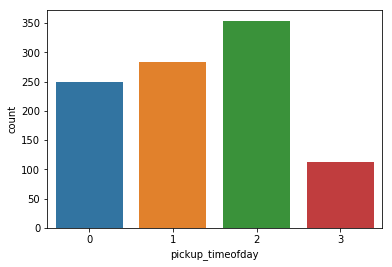

In [17]:
sns.countplot(data['pickup_timeofday'])

In [18]:
def ispeak_numeric(x):
    if x == False:
        return 0
    else:
        return 1

In [19]:
data['pickup_ispeak'] = data['pickup_ispeak'].apply(lambda x: ispeak_numeric(x))

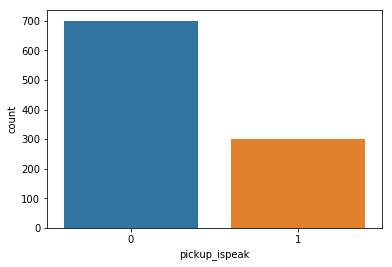

In [20]:
sns.countplot(data['pickup_ispeak'])

In [21]:
data['dropoff_ispeak'] = data['dropoff_ispeak'].apply(lambda x: ispeak_numeric(x))

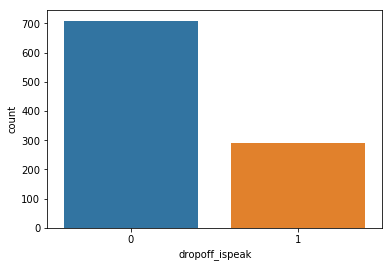

In [22]:
sns.countplot(data['dropoff_ispeak'])

In [23]:
def location_numeric(x):
    if x == 'manhattan':
        return 0
    if x == 'brooklyn':
        return 1
    if x == 'queens':
        return 2

In [24]:
data['pickup_borough'] = data['pickup_borough'].apply(lambda x: location_numeric(x))

In [25]:
data['dropoff_borough'] = data['dropoff_borough'].apply(lambda x: location_numeric(x))

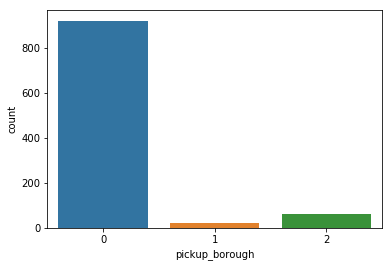

In [26]:
sns.countplot(data['pickup_borough'])

In [29]:
data['dropoff_timeofday'] = data['dropoff_timeofday'].apply(lambda x: pickup_timeofday_numeric(x))

In [33]:
data['dropoff_datetime'] = data['dropoff_datetime'].apply(pd.to_datetime)

In [34]:
data['pickup_datetime'] = data['pickup_datetime'].apply(pd.to_datetime)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, id2875421 to id3498529
Data columns (total 21 columns):
vendor_id             999 non-null int64
pickup_datetime       999 non-null datetime64[ns]
dropoff_datetime      999 non-null datetime64[ns]
passenger_count       999 non-null int64
store_and_fwd_flag    999 non-null int64
trip_duration         999 non-null int64
pickup_timeofday      999 non-null int64
pickup_ispeak         999 non-null int64
pickup_day            999 non-null int64
dropoff_timeofday     999 non-null int64
dropoff_ispeak        999 non-null int64
dropoff_day           999 non-null int64
pickup_borough        999 non-null int64
dropoff_borough       989 non-null float64
distance              999 non-null int64
pickup_x              999 non-null float64
pickup_y              999 non-null float64
pickup_z              999 non-null float64
dropoff_x             999 non-null float64
dropoff_y             999 non-null float64
dropoff_z             999 non-null f

# Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import confusion_matrix

In [79]:
X = data.drop(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration'], axis = 1)
y = data['trip_duration']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [82]:
lm = LinearRegression()

In [83]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
predictions = lm.predict(X_test)

In [89]:
print('Linear Regression R squared": %.4f' % lm.score(X_test, y_test))

Linear Regression R squared": -185.2424


In [90]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(predictions, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 8024.8042


In [91]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(predictions, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 966.7337


# Random Forest Regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
forest_reg = RandomForestRegressor(random_state=101)

In [94]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [95]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": -4.3391


In [96]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 1358.7183


In [97]:
from sklearn.metrics import mean_absolute_error
forest_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % forest_mae)

Linear Regression MAE: 429.0862


# Gradient Boosting

In [98]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [99]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": -27.0531


In [100]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 3114.4820


In [101]:
from sklearn.metrics import mean_absolute_error
model_mae = mean_absolute_error(y_pred, y_test)
print('Gradient Boosting Regression MAE: %.4f' % model_mae)

Gradient Boosting Regression MAE: 538.9983


In [105]:
columns_name = X.columns

In [109]:
importance = model.feature_importances_

In [110]:
feature_indexes_by_importance = importance.argsort()

In [111]:
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(columns_name[index], (importance[index] *100.0)))

store_and_fwd_flag-0.00%
pickup_borough-0.66%
dropoff_borough-0.78%
dropoff_ispeak-1.04%
pickup_ispeak-1.41%
passenger_count-1.54%
pickup_day-1.63%
dropoff_day-4.84%
pickup_z-6.75%
pickup_y-6.82%
dropoff_timeofday-7.70%
dropoff_y-8.70%
distance-9.83%
pickup_timeofday-9.93%
dropoff_z-10.93%
dropoff_x-11.74%
pickup_x-15.69%


# ANN

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold, cross_val_score

In [68]:
def baseline_model():
    model = Sequential()
    model.add(Dense(17, input_dim=17, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [69]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [71]:
X = data.drop(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration'], axis = 1)
y = data['trip_duration']

In [75]:
kfold = KFold(n_splits=10, random_state=101)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -7297659.77 (21251750.73) MSE


In [77]:
model.predict()

TypeError: predict() missing 1 required positional argument: 'x'